***This script answers the following questions:

1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.***

3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.***

4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.***

The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

5b. Are there differences in ordering habits based on a customer’s loyalty status?

5c. Are there differences in ordering habits based on a customer’s region?

5d. Is there a connection between age and family status in terms of ordering habits? Note: Instacart is a real company that’s made their data available online. However, the contents of this project brief have been fabricated for the purpose of this Achievement.

5e. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status? (Answered in previous document 4.10 IC)

5f. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.
Senior Vice President of Sales: “We need to know what part of our offering has the lowest market share and why. Based on this input, we could improve this sector and boost sales.”***

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time

start_time = time.time()

In [3]:
# Create path to Prepared data folder
path_prepared = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Prepared data'

# Create path to 'Visualizations' folder
path_visualizations = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

# Create path to Original data folder
path_original = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Original data'

In [4]:
# Import Instacart_data_set file
df_final = pd.read_pickle(os.path.join(path_prepared, 'instacart_data_set.pkl'))


## Busiest Days of the Week

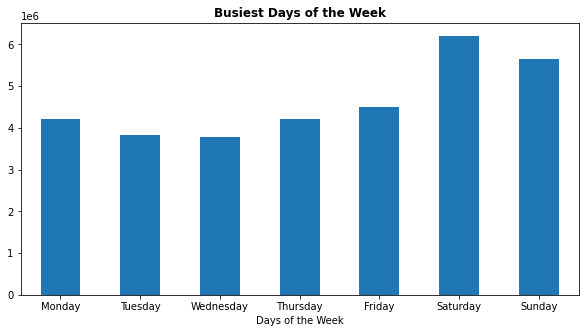

In [5]:
# Create a bar chart 'orders_day_of_the_week'
busiest_days = df_final['orders_day_of_the_week'].value_counts().loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week')
busiest_day = busiest_days.plot.bar(rot=0)
plt.savefig(os.path.join(path_visualizations, 'bar_busiest_day.png'))

In [6]:
# Create DataFrame to export
table_busiest_days = pd.DataFrame(busiest_days.sort_values(ascending=False))

In [7]:
table_busiest_days

,orders_day_of_the_week
Saturday,6203329
Sunday,5659298
Friday,4495887
Monday,4213105
Thursday,4205076
Tuesday,3839865
Wednesday,3783172


***The bar plot shows: Saturday and Sunday are the busiest day, and Wednesday and Tuesday least.*** 

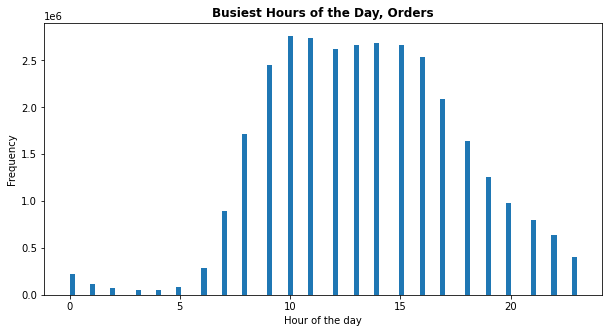

In [8]:
#Create a histogram with 'order_hour_of_day' using '.plot.hist()' function
plt.rcParams['figure.figsize'] = [10, 5]
hist = df_final['order_hour_of_day'].plot.hist(bins = 100)
plt.title('Busiest Hours of the Day, Orders', fontweight = 'bold')
plt.xlabel('Hour of the day')
plt.savefig(os.path.join(path_visualizations, 'bar_busiest_hour_ord.png'))

***The mayority of orders are made between 8am and 6 pm. 11am is the busiest time.***

In [9]:
table_hour_ords = df_final['order_hour_of_day'].value_counts()
table_hour_ords

10    2761333
11    2735694
14    2688728
15    2661718
13    2660570
12    2618104
16    2534744
9     2453842
17    2087273
8     1717863
18    1636226
19    1258076
20     976000
7      890923
21     795528
22     634159
23     402272
6      290450
0      218742
1      115683
5       87944
2       69360
4       53232
3       51268
Name: order_hour_of_day, dtype: int64

In [10]:
#Defining new df 
dfspend_hour = pd.crosstab(df_final['order_hour_of_day'], df_final['prices'].sum())

In [11]:
dfspend_hour = pd.DataFrame(np.row_stack([dfspend_hour.columns, dfspend_hour.values]),
    columns=['revenue'])

In [12]:
dfspend_hour.head()

,revenue
0,252426120.6
1,218742.0
2,115683.0
3,69360.0
4,51268.0


In [13]:
dfspend_hour = dfspend_hour.reset_index()

In [14]:
dfspend_hour.head()

,index,revenue
0,0,252426120.6
1,1,218742.0
2,2,115683.0
3,3,69360.0
4,4,51268.0


In [15]:
dfspend_hour = dfspend_hour.rename(columns = {'index': 'hour'})

In [16]:
dfspend_hour.drop(0, axis=0, inplace=True)


In [17]:
dfspend_hour

,hour,revenue
1,1,218742.0
2,2,115683.0
3,3,69360.0
4,4,51268.0
5,5,53232.0
6,6,87944.0
7,7,290450.0
8,8,890923.0
9,9,1717863.0
10,10,2453842.0


In [18]:
described_revenue_hour = dfspend_hour.describe()

In [19]:
described_revenue_hour

,hour,revenue
count,24.000000,2.400000e+01
mean,12.500000,1.349989e+06
std,7.071068,1.078195e+06
min,1.000000,5.126800e+04
25%,6.750000,2.725230e+05
50%,12.500000,1.117038e+06
75%,18.250000,2.555584e+06
max,24.000000,2.761333e+06


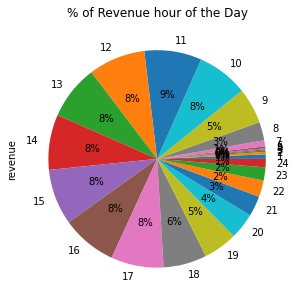

In [20]:
#Visual categorization Age groups.
revenue_pie = dfspend_hour['revenue'].plot.pie(title ='% of Revenue hour of the Day', autopct=('%1.f%%'))
plt.savefig(os.path.join(path_visualizations, 'pie_percentile_rev_hour.png'))

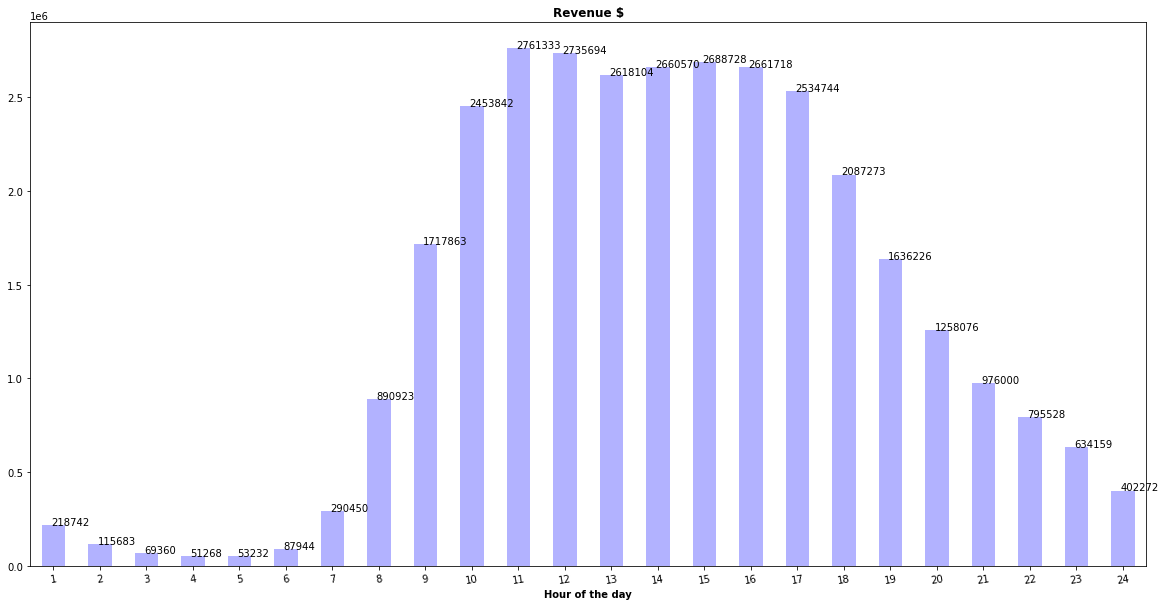

In [21]:
#Create barplot with revenue labels

plt.rcParams['figure.figsize'] = [20, 10]

revenue_bar = dfspend_hour['revenue'].plot.bar(title ='Revenue', color= (0, 0, 1, 0.3), rot=9)
plt.xticks(range(len(dfspend_hour)), dfspend_hour.index)

for i in revenue_bar.patches:
    plt.text(i.get_x() + 0.2, i.get_height()+ 200, \
             int(i.get_height()), fontsize=10, color='black')
plt.title('Revenue $', fontweight = 'bold')
plt.xlabel('Hour of the day', fontweight = 'bold')
plt.savefig(os.path.join(path_visualizations, 'bar_total_revenue_hour.png'))
# show the plot
plt.show()


***The revenue during the day match with the busiest hours with we can safely hypothisize that the prices of the product sold are proporcionally equal throuth the day.***

In [105]:
dfspend_hour['revenue'].describe().to_clipboard()

## 3. Price range

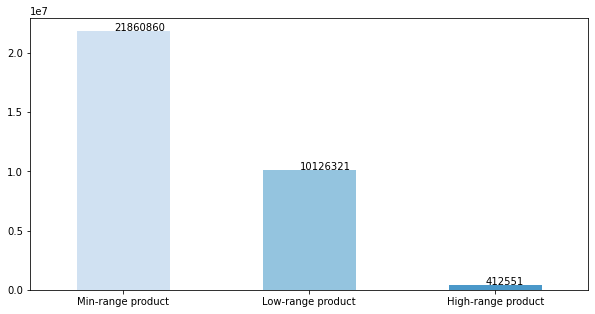

In [22]:
#Create barplot num of orders by price-range 

plt.rcParams['figure.figsize'] = [10, 5]

df = df_final['price_range_loc'].value_counts().plot.bar(rot=0,color = sns.color_palette('Blues', 4))
plt.rcParams['figure.figsize'] = [5, 15]
for i in df.patches:
    plt.text(i.get_x() + 0.2, i.get_height()+ 200, \
             str(round((i.get_height()), 2)), fontsize=10, color='black')
plt.savefig(os.path.join(path_visualizations, 'bar_units_sold_prices_range.png'))

***Products categorized has mid_range product by their prices are sold the most.***

In [76]:
table_price_range = df_final.groupby(['price_range_loc']).agg({'prices': ['count', 'mean', 'max', 'min']})
table_price_range = table_price_range.reset_index()
table_price_range.to_clipboard()

### 4.Frequency product orders

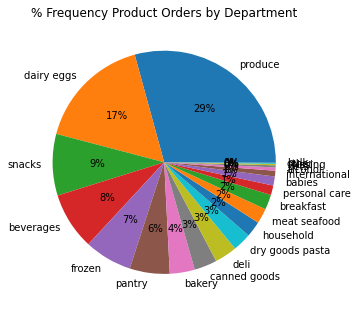

In [24]:
#Create pie, percentile of Orders by Department

product_pie = df_final['department'].value_counts().plot.pie(title ='% Frequency Product Orders by Department', label= '', autopct=('%1.f%%'))
plt.savefig(os.path.join(path_visualizations, 'pie_precent_dept.png'))

***In percentile terms the Department "produce", "dairy eggs" and "snacks" represent 58% of the total orders.***

In [25]:
table_dept_sales = pd.DataFrame(df_final['department'].value_counts(ascending=False))
table_dept_sales

,department
produce,9479291
dairy eggs,5393620
snacks,2887550
beverages,2688123
frozen,2234743
pantry,1875369
bakery,1172428
canned goods,1068058
deli,1051249
dry goods pasta,866627


In [67]:
table_dept_sales.describe().to_clipboard()

In [27]:
table_dept_sales_top = table_dept_sales.head(5)
table_dept_sales_bottom = table_dept_sales.tail(5)
table_dept_sales_top, table_dept_sales_bottom

(            department
 produce        9479291
 dairy eggs     5393620
 snacks         2887550
 beverages      2688123
 frozen         2234743,
          department
 alcohol      153696
 pets          97716
 missing       69145
 other         36291
 bulk          34573)

## Creating list of products sold to a single user

In [28]:
#Creating a DataFrame
df_customer_loyalty_brand = pd.DataFrame(df_final['user_id'], df_final['product_id'])

In [29]:
df_brand_loyal = pd.DataFrame(df_customer_loyalty_brand.groupby(['user_id', 'product_id']).value_counts().sort_values(ascending = False))

In [30]:
df_brand_loyal.describe()

,0
count,49657.000000
mean,652.470588
std,4792.588683
min,1.000000
25%,17.000000
50%,60.000000
75%,260.000000
max,472565.000000


In [31]:
df_brand_loyal.to_csv('df_brand_loyal.csv', header=False)

df_brand_loyal = pd.read_csv('df_brand_loyal.csv', header=None)

df_brand_loyal = df_brand_loyal.rename(columns ={0: 'user_id', 1: 'product_id', 2: 'product_count'})

In [32]:
#Table single product sold counts to a single customers

df_brand_loyal

,user_id,product_id,product_count
0,26731,24852,472565
1,14537,13176,379450
2,23341,21137,264683
3,24526,21903,241921
4,49011,47209,213584
...,...,...,...
49652,50334,48461,1
49653,8723,8435,1
49654,41095,37660,1
49655,25879,23741,1


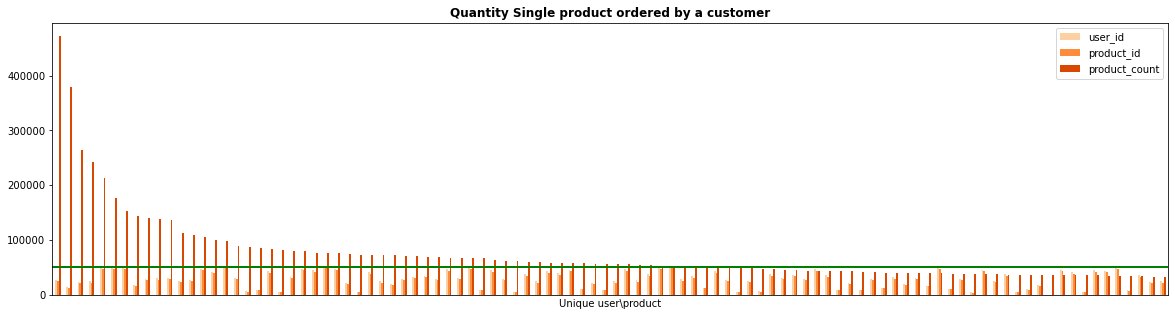

In [33]:
#Create bar chart with top 100 products sold to a single user

plt.rcParams['figure.figsize'] = [20, 5]
brand_loyalty = df_brand_loyal.head(100).plot.bar(color = sns.color_palette('Oranges', 3))
plt.axhline(y=50000, color= 'green', linewidth=2, label= '50000')
plt.title('Quantity Single product ordered by a customer', fontweight = 'bold')
plt.xlabel('Unique user\product')
plt.xticks([])
plt.savefig(os.path.join(path_visualizations, 'bar_quantity_user_top.png'))

***The chart shows the quantity of product sold to a user (unique values). The line in x axis marks 50000 sales of single product.***

In [34]:
table_brand_loyalty_des = pd.DataFrame(df_brand_loyal['product_count'].describe())

In [106]:
#Summary description table

table_brand_loyalty_des.to_clipboard()

***In this table we identify how many of the same product have been bougth by a single user. 75% of the customers ordered a product no more than 260 times (3rd quarlite). Therefore 25% of the customer with the amount of 261 units of the same product or more could be addressed as an opportunity to develop a new market focused on B2B sales.***

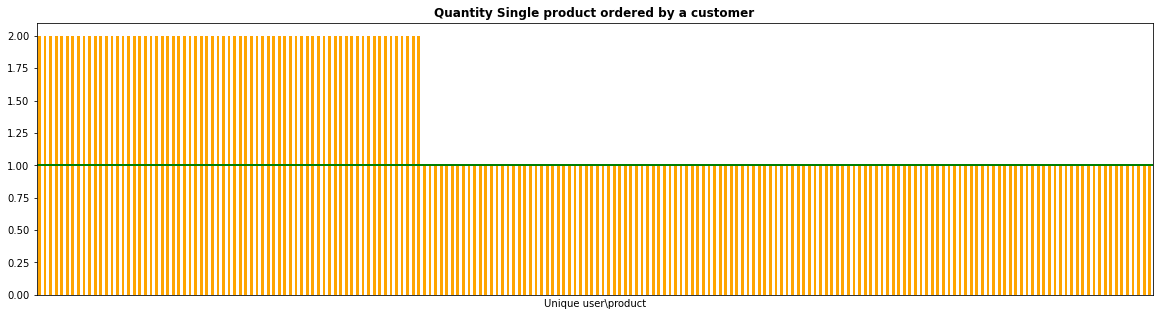

In [36]:
#Create bar chart with bottom 200 products sold to a single user

plt.rcParams['figure.figsize'] = [20, 5]

df_brand_loyal.product_count.tail(200).plot.bar(color = 'orange')
plt.axhline(y=1, color= 'green', linewidth=2, label= '1 unit')

plt.title('Quantity Single product ordered by a customer', fontweight = 'bold')
plt.xlabel('Unique user\product')
plt.xticks([])
plt.savefig(os.path.join(path_visualizations, 'bar_quantity_user_bottom.png'))

In [37]:
one_time_purchases = df_brand_loyal.product_count.isin([1]).value_counts()


In [38]:
one_time_purchases

False    49526
True       131
Name: product_count, dtype: int64

***131 products had been bought by a customer only once, further analyses is require to determent why the user didn't buy it again***

## Frequency_flag

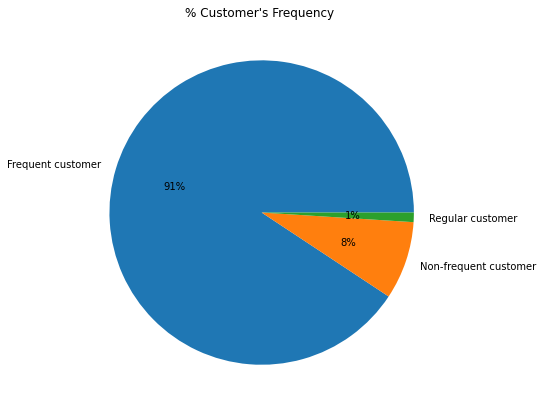

In [39]:
#Create pie frequency flag

plt.rcParams['figure.figsize'] = [7, 7]
frequenzy_pie = df_final['frequency_flag'].value_counts().plot.pie(title = "% Customer's Frequency ", label = '', autopct=('%1.f%%'))
plt.savefig(os.path.join(path_visualizations, 'pie_percentile_cust_freq.png'))

***Frequent customers constitute 91% of the sales in instacart (customers who repeatly order the same product).***

In [74]:
df_final['frequency_flag'].value_counts().describe().to_clipboard()

## Loyalty brand

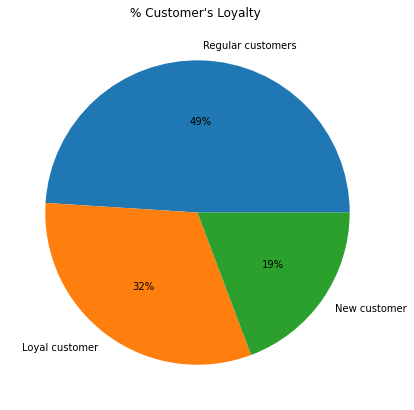

In [41]:
#Create pie customer's loyalty flag

loyalty_pie = df_final['loyalty_flag'].value_counts().plot.pie(title = "% Customer's Loyalty ", label = '', autopct=('%1.f%%'))
plt.savefig(os.path.join(path_visualizations, 'pie_percentile_cust_loyalty.png'))

In [71]:
df_final['loyalty_flag'].value_counts().describe().to_clipboard()

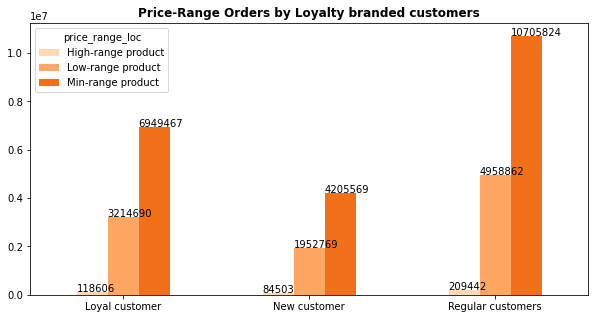

In [42]:
#create barplot Price-Range Orders by Loyalty branded customers

loyal_price = pd.crosstab(df_final['loyalty_flag'], df_final['price_range_loc'])

plt.rcParams['figure.figsize'] = [10, 5]

loyal_price_bar = loyal_price.plot.bar(color = sns.color_palette('Oranges', 4), rot=0)
for i in loyal_price_bar.patches:
    plt.text(i.get_x(), i.get_height()+ 1, \
             str(round((i.get_height()), 2)), fontsize=10, color='black')
plt.title('Price-Range Orders by Loyalty branded customers', fontweight = 'bold')
plt.xlabel('')
plt.savefig(os.path.join(path_visualizations, 'bar_price_range_cust_loyalty.png'))

***Customers categoriced as "regular customers" had bought higher num of product in all three price-range categories***

In [77]:
loyal_price.describe().to_clipboard()

## Ordering habits by region

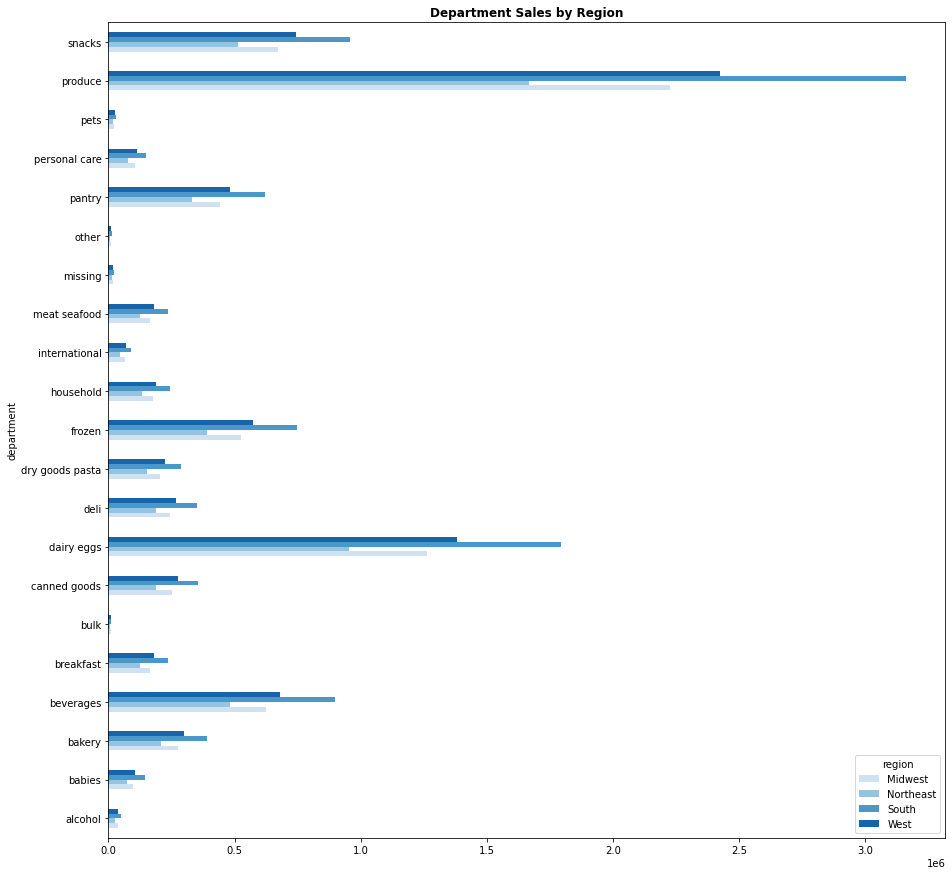

In [44]:
#Create bar plot Department sales by region

plt.rcParams['figure.figsize'] = [15, 15]

ord_region = pd.crosstab(df_final['department'], df_final['region'])
region_habit = ord_region.plot.barh(color = sns.color_palette('Blues', 4))
plt.title('Department Sales by Region', fontweight = 'bold')
plt.xlabel('')
plt.savefig(os.path.join(path_visualizations, 'bar_dept_sales_region.png'))

***Sales from 'produce', 'dairy eggs', and 'snacks' department are the highest in every region. And the lowest sales from 'bulk',' 'other', 'pets' and 'alcohol' department the lowest. The bar shows the greatest amount of orders is done from South region, and the lowest in Northeast.***

In [45]:
df_region_ord = df_final['region'].value_counts()
df_region_ord

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

In [107]:
df_region_ord.describe().to_clipboard()

In [108]:
df_region_rev = df_final.groupby(['region']).agg(total_revenue = ('prices', 'sum'))
df_region_rev = df_region_rev.reset_index()
df_region_rev.to_clipboard()

## % Orders by Family Status

In [47]:
#Create family status subset
df_fam = df_final[['family_status','order_id']]

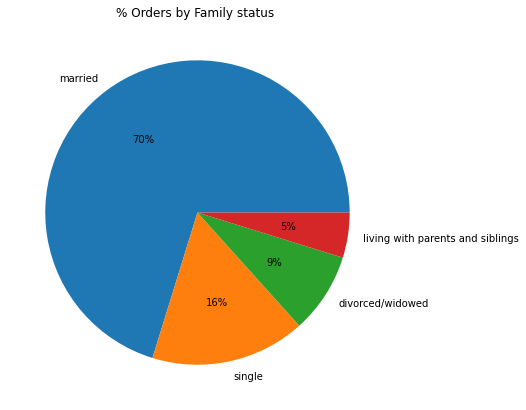

In [48]:
#Create pie percentile description

plt.rcParams['figure.figsize'] = [7, 7]
df_fam_pie = df_final['family_status'].value_counts().plot.pie(title = "% Orders by Family status ", label = '', autopct=('%1.f%%'))
plt.savefig(os.path.join(path_visualizations, 'pie_percentile_fam_status_ord.png'))

***70 % of the purchases are done by married customers, 5% are categorized as ' living with parents and siblings'***

In [72]:
df_fam_status_ord = df_fam.groupby('family_status').describe()
df_fam_status_ord.to_clipboard()

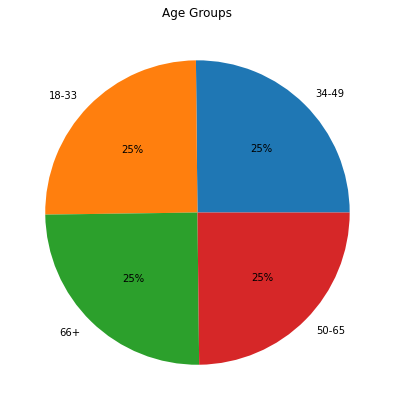

In [50]:
#Visual categorization Age groups.
age_pie = df_final['age_range'].value_counts().plot.pie(title ='Age Groups', label = '', autopct=('%1.f%%'))

In [51]:
df_age_ord = df_final.groupby(['age_range']).agg(orders_count = ('order_id', 'count'))
df_age_ord = df_age_ord.reset_index()
df_age_ord

,age_range,orders_count
0,18-33,8119000
1,34-49,8151809
2,50-65,8042087
3,66+,8086836


## Family status-Age range, Purchasing habits

In [52]:
#Creating subset

age_famst_habits = pd.crosstab(df_final['family_status'], df_final['age_range'])

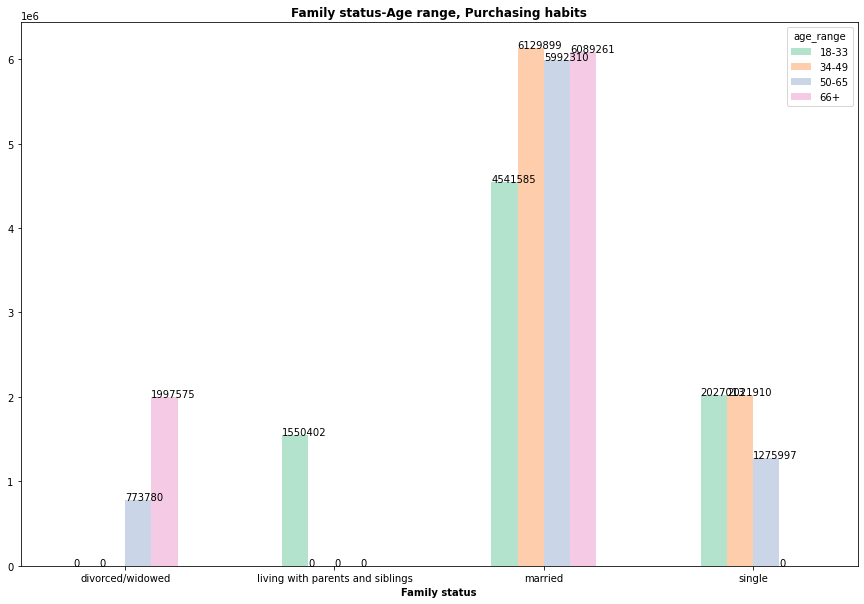

In [53]:
#Create age-range orders by Family status barplot 

plt.rcParams['figure.figsize'] = [15, 10]
age_famst_habits_sct = age_famst_habits.plot.bar(color = sns.color_palette('Pastel2', 4), rot=0)
plt.title('Family status-Age range, Purchasing habits', fontweight = 'bold')
plt.xlabel('Family status', fontweight = 'bold')
for i in age_famst_habits_sct.patches:
    plt.text(i.get_x(), i.get_height()+ 200, \
             str(round((i.get_height()), 2)), fontsize=10, color='black')
plt.savefig(os.path.join(path_visualizations, 'bar_fam_agerange_ords.png'))

***Age-range orders by family status. The bars show that the highest number of orders is being placed by married customers. However, we observe that there are subgroups that are not reflected in the sales data (values = 0), such as divorced customers between 18 and 49 years old. This indicates potential errors in data collection or a need for improvement in gathering data to enhance the reliability of the analysis.***

In [78]:
age_famst_habits = age_famst_habits.describe()
age_famst_habits.to_clipboard()

In [55]:
#Create scatterplot family status purchases by department

sctr = df_final.groupby(['department', 'family_status', 'age_range']).agg(total_orders=('department', 'count'))

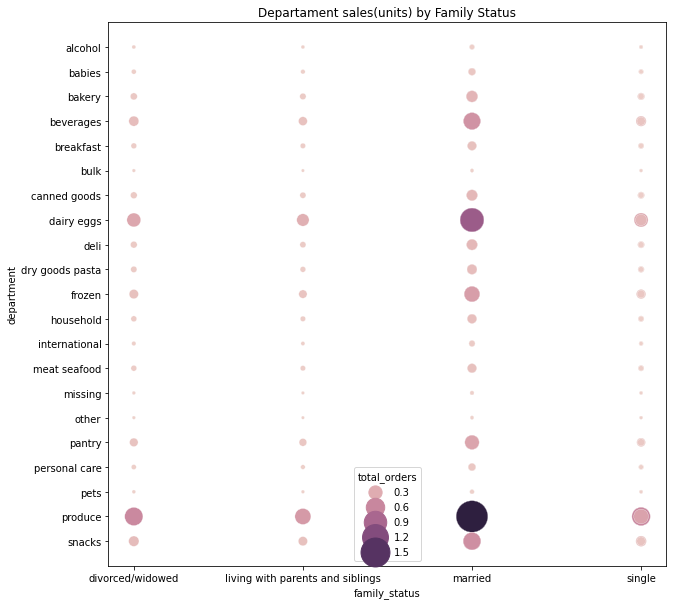

In [80]:
plt.rcParams['figure.figsize'] = [10, 10]
scatter = sns.scatterplot(x = 'family_status', y = 'department', size='total_orders', sizes=(10,1000), hue='total_orders', data = sctr).set(title = 'Departament sales(units) by Family Status')
plt.savefig(os.path.join(path_visualizations, 'sctr_ords_fam_dept.png'))

***This scatterplot shows the number of orders by Family status group per Department. The Darker colors represent higher number of orders done by the given group***

In [57]:
df_fam_special_profile = pd.DataFrame(sctr.sort_values(by = 'total_orders', ascending=False))
df_fam_special_profile = df_fam_special_profile.reset_index()

In [58]:
#Create table, subgroup fam_status-age_range orders

df_fam_special_profile

,department,family_status,age_range,total_orders
0,produce,married,34-49,1797019
1,produce,married,66+,1779857
2,produce,married,50-65,1751348
3,produce,married,18-33,1325994
4,dairy eggs,married,34-49,1026812
...,...,...,...,...
205,missing,divorced/widowed,50-65,1466
206,other,single,50-65,1459
207,bulk,single,50-65,1252
208,other,divorced/widowed,50-65,876


In [96]:
df_fam_special_profile_top = df_fam_special_profile.head(10)

In [97]:
df_fam_special_profile_top.to_clipboard()

In [98]:
df_fam_special_profile.tail(10).to_clipboard()

In [99]:
df_fam_special_profile.describe().to_clipboard()

In [59]:
#Create scatterplot revenue from family status by department

scattr = df_final.groupby(['department', 'family_status', 'age_range']).agg(total_revenue=('prices', 'sum'))
scattr = scattr.reset_index()

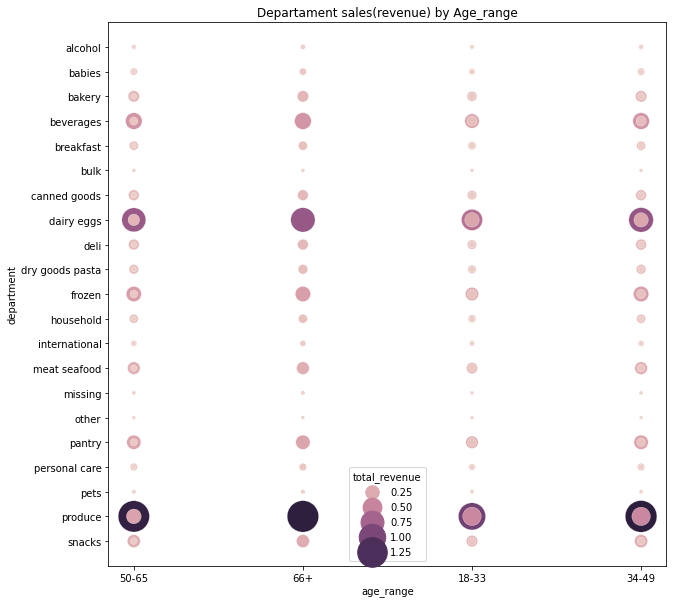

In [82]:
plt.rcParams['figure.figsize'] = [10, 10]
scatter_rev = sns.scatterplot(x = 'age_range', y = 'department', size='total_revenue', sizes=(10,1000), hue='total_revenue', data = scattr).set(title = 'Departament sales(revenue) by Age_range')
plt.savefig(os.path.join(path_visualizations, 'sctr_ords_fam_revenue_dept.png'))

In [61]:
df_rev_special_profile = pd.DataFrame(scattr.sort_values(by = 'total_revenue', ascending=False))

In [62]:
df_rev_special_profile

,department,family_status,age_range,total_revenue
194,produce,married,34-49,14336560.7
196,produce,married,66+,14184659.0
195,produce,married,50-65,13997104.5
193,produce,married,18-33,10562989.2
74,dairy eggs,married,34-49,8556129.9
...,...,...,...,...
140,missing,divorced/widowed,50-65,12652.5
59,bulk,single,50-65,10645.2
159,other,single,50-65,10212.7
150,other,divorced/widowed,50-65,6259.0


In [101]:
df_rev_special_profile.describe().to_clipboard()

In [102]:
df_rev_special_profile.head(10).to_clipboard()

In [103]:
df_rev_special_profile.tail(10).to_clipboard()

***In this table we see the most & the least profiteable customer profiles by department***

## Export tables

In [63]:
table_busiest_days.to_csv(os.path.join(path_prepared, 'table_busiest_days.csv'))

table_dept_sales.to_csv(os.path.join(path_prepared, 'table_dept_sales.csv'))

described_revenue_hour.to_csv(os.path.join(path_prepared, 'described_revenue_hour.csv'))

table_price_range.to_csv(os.path.join(path_prepared, 'table_price_range.csv'))

table_dept_sales_top.to_csv(os.path.join(path_prepared, 'table_dept_sales_top.csv'))

table_dept_sales_bottom.to_csv(os.path.join(path_prepared, 'table_dept_sales_bottom.csv'))

df_brand_loyal.head(5).to_csv(os.path.join(path_prepared, 'df_brand_loyal_top_5.csv'))

df_brand_loyal.tail(5).to_csv(os.path.join(path_prepared, 'df_brand_loyal_bottom_5.csv'))

table_brand_loyalty_des.to_csv(os.path.join(path_prepared, 'table_brand_loyalty_des.csv'))

df_final['frequency_flag'].value_counts().to_csv(os.path.join(path_prepared, 'table_frequency_flag.csv'))

loyal_price.describe().to_csv(os.path.join(path_prepared, 'table_loyalty_price_range.csv'))

df_region_rev.to_csv(os.path.join(path_prepared, 'table_region_rev.csv'))

df_fam_status_ord.to_csv(os.path.join(path_prepared, 'table_fam_status_ord.csv'))

df_age_ord.to_csv(os.path.join(path_prepared, 'table_age_ord.csv'))

df_fam_special_profile.to_csv(os.path.join(path_prepared, 'table_fam_special_ord_profile.csv'))

df_rev_special_profile.to_csv(os.path.join(path_prepared, 'table_rev_special_profile.csv'))

table_hour_ords.to_csv(os.path.join(path_prepared, 'table_hour_ords.csv'))

df_region_ord.to_csv(os.path.join(path_prepared, 'table_region_ord.csv'))

# Importing the visualizations

gen_spend.figure.savefig(os.path.join(path_visualizations, '4_10_bar_gen_spend.png'),dpi=300, bbox_inches = "tight")

act_inc.figure.savefig(os.path.join(path_visualizations, '4_10_bar_act_inc.png'),dpi=300, bbox_inches = "tight")

inc.figure.savefig(os.path.join(path_visualizations, '4_10_bar_inc_prices.png'),dpi=300, bbox_inches = "tight")

price_region.figure.savefig(os.path.join(path_visualizations, '4_10_bar_price_region.png'),dpi=300, bbox_inches = "tight")

region_income.figure.savefig(os.path.join(path_visualizations, '4_10_bar_region_income.png'),dpi=300, bbox_inches = "tight")

region_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_region_dept.png'),dpi=300, bbox_inches = "tight")

bars.figure.savefig(os.path.join(path_visualizations, '4_10_bar_summary.png'),dpi=300, bbox_inches = "tight")

size_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_family_size_dept.png'),dpi=300, bbox_inches = "tight")

age_size_hour.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_family_size_hour.png'),dpi=300, bbox_inches = "tight")

age_size_day.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_family_size_day.png'),dpi=300, bbox_inches = "tight")

age_days.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_days.png'),dpi=300, bbox_inches = "tight")

age_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_dept.png'),dpi=300, bbox_inches = "tight")

age_spend.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_price_range.png'),dpi=300, bbox_inches = "tight")

barh_age_region.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_region.png'),dpi=300, bbox_inches = "tight")

age_pie.figure.savefig(os.path.join(path_visualizations, '4_10_age_pie.png'),dpi=300, bbox_inches = "tight")

In [66]:
timer = (time.time() - start_time)/60
print(timer)

2.0567977984746295
